<h1><center>CSCI - 6409 - The Process of Data Science - Fall 2022</h1></center>
<h1><center>Group 3</h1></center>
<h1><center>Black Friday Sales Prediction</h1></center>

<center>
<b>Anmol Sidhu</b> - <b>B00923820</b>

<b>Fenil Milankumar Parmar</b> - <b>B00895684</b>

<b>Kalpit Machhi</b> - <b>B00911364</b>

<b>Omid Amini</b> - <b>B00942240</b>

<b>Amankumar Manojkumar Patel</b> - <b>B00888136</b>

</center>

# Initialization of project

## Importing required basic libraries

In [ ]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing required basic libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/black friday dataset/train.csv')

In [ ]:
df_train['set']='train'

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/black friday dataset/test.csv')

In [ ]:
df_test['set']='test'

In [ ]:
#merging into one dataframe
df=pd.concat([df_train,df_test])
df_bak=df

# Data Exploration and EDA

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,set
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [ ]:
#Total records and columns
df.shape

(783667, 13)

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'set'],
      dtype='object')

## Performing EDA on data to understand the data

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


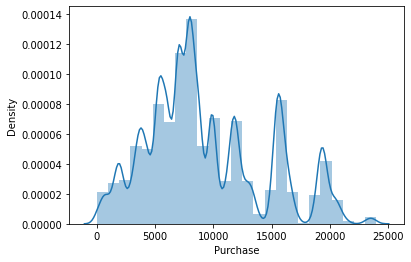

In [ ]:
#distribution of purchase
sns.distplot(df["Purchase"],bins=25)

The dataset shows a normal distribution

## Plots to see the distribution of various features in our dataset

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

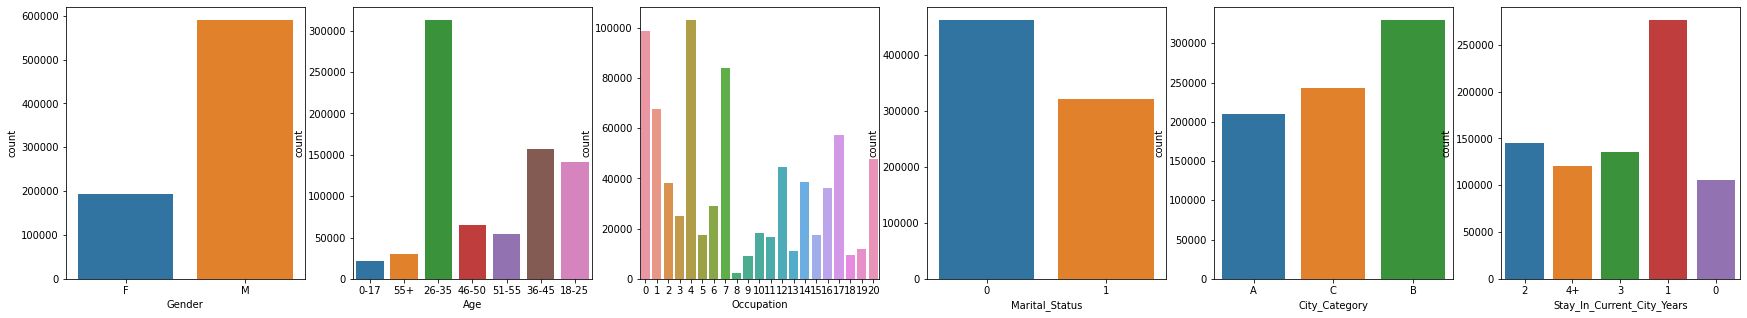

In [ ]:
#plots to see the distribution of various features in our dataset
fig,ax=plt.subplots(1,6,figsize=(30,5))
sns.countplot(df['Gender'],ax=ax[0])
sns.countplot(df['Age'],ax=ax[1])
sns.countplot(df['Occupation'],ax=ax[2])
sns.countplot(df['Marital_Status'],ax=ax[3])
sns.countplot(df['City_Category'],ax=ax[4])
sns.countplot(df['Stay_In_Current_City_Years'],ax=ax[5])


1. We have more males in the dataset than females.<br>
2. Out of all the orders placed , the age category (26-35) had the highest number of orders .<br>
3. Occupation 3 has the highest number of people purchasing during the black friday sale.<br>
4.Unmarried people have purchased more as compared to married people.<br>
5.City Category B had the most number of purchases.<br>
6.People who have moved in the city and living from 1 year have purchased the most.

In [ ]:
df['Product_ID'].value_counts().sort_values(ascending=False)

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00100242       1
P00156942       1
P00359842       1
P0099542        1
P00253842       1
Name: Product_ID, Length: 3677, dtype: int64

Product P00265242 was purchased the most

### Product P00265242 was purchased the most

In [ ]:
product_df=df.groupby(['Product_ID']).Purchase.agg('mean').to_frame('Mean_Puchase').reset_index()
product_df

,Product_ID,Mean_Puchase
0,P00000142,11143.642361
1,P00000242,10551.851064
2,P00000342,5313.422131
3,P00000442,4795.358696
4,P00000542,5417.530201
...,...,...
3672,P0099542,NaN
3673,P0099642,6439.230769
3674,P0099742,7872.603175
3675,P0099842,7228.549020


## distribution of each product category w.r.t purchase

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


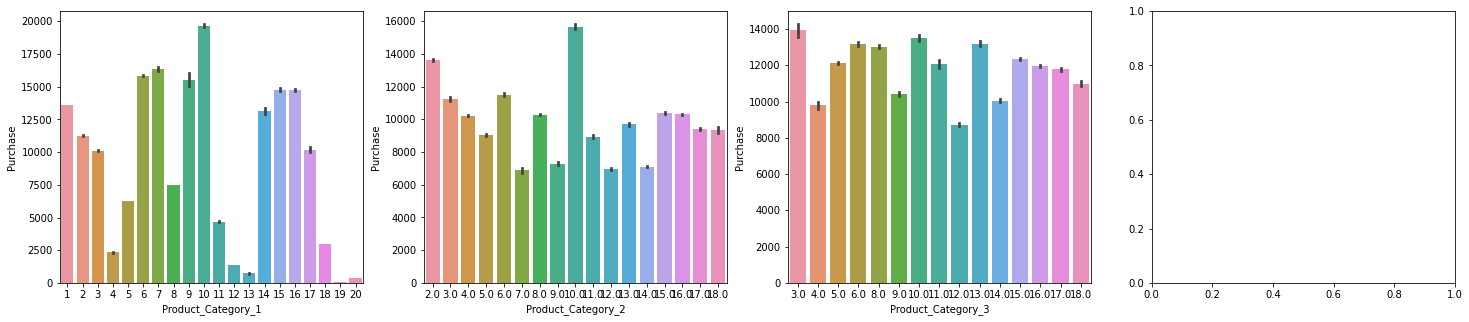

In [ ]:
#distribution of each product category w.r.t purchase
fig,ax=plt.subplots(1,4,figsize=(25,5))
sns.barplot('Product_Category_1','Purchase',data=df,ax=ax[0])
sns.barplot('Product_Category_2','Purchase',data=df,ax=ax[1])
sns.barplot('Product_Category_3','Purchase',data=df,ax=ax[2])

1. In Prodcut_Category_1 , category 10 adds up to highest amount of purchases.<br>
2.In Prodcut_Category_2 , category 10 adds up to highest amount of purchases.<br>
3.In Prodcut_Category_3 , category 3 adds up to highest amount of purchases.<br>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

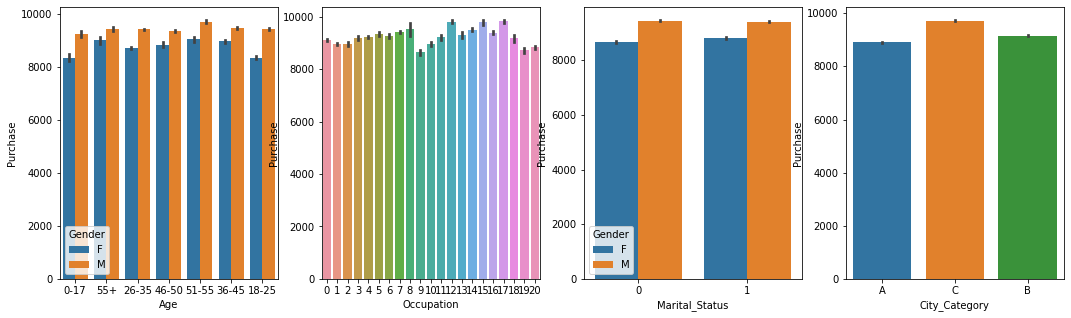

In [ ]:
fig,ax=plt.subplots(1,4,figsize=(18,5))
sns.barplot('Age','Purchase',hue='Gender',data=df,ax=ax[0])

sns.barplot('Occupation','Purchase',data=df,ax=ax[1])

sns.barplot('Marital_Status','Purchase',hue='Gender',data=df,ax=ax[2])
sns.barplot('City_Category','Purchase',data=df,ax=ax[3])



1.Males and females from the age category (51-55) had the highest amount of pruchases even though age category 6 had very less people.<br>
2.Mostly all of the occupations have similar purchasing trends.<br>
3.Married females have purchased more than unmarried females, whereas married and unmarried men have similar purchases. Overall, men have purchased more than females in both the cases.



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


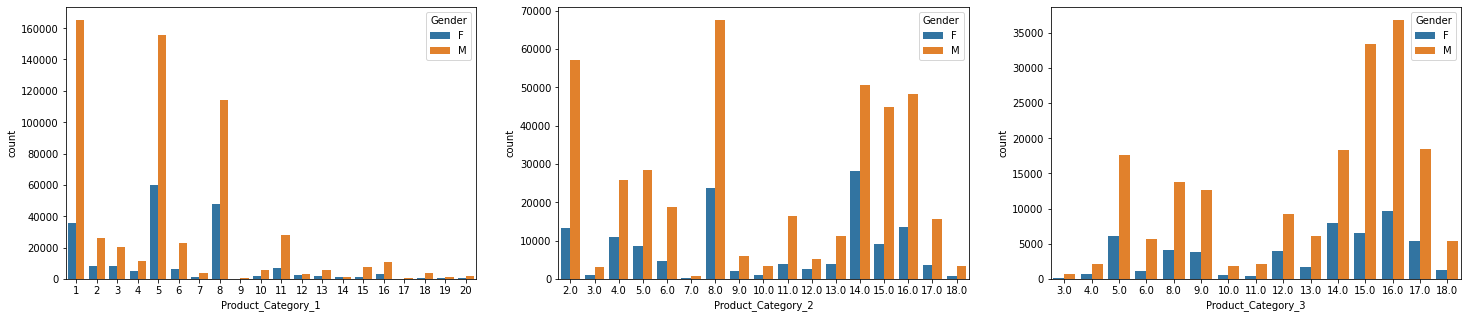

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(25,5))

sns.countplot(df['Product_Category_1'],hue=df['Gender'],data=df,ax=ax[0])

sns.countplot(df['Product_Category_2'],hue=df['Gender'],data=df,ax=ax[1])

sns.countplot(df['Product_Category_3'],hue=df['Gender'],data=df,ax=ax[2])

## Initial Correlation Matrix


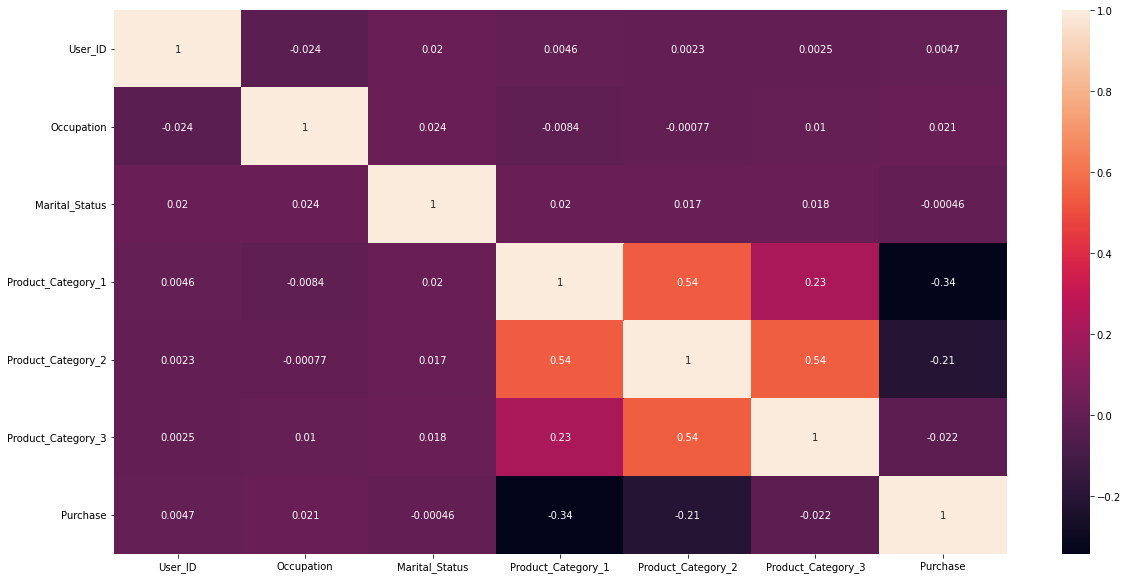

In [ ]:
#heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,set
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,783667.0,1.003029e+06,1727.266668,1000001.0,1001519.0,1003075.0,1004478.0,1006040.0
Occupation,783667.0,8.079300e+00,6.522206,0.0,2.0,7.0,14.0,20.0
Marital_Status,783667.0,4.097774e-01,0.491793,0.0,0.0,0.0,1.0,1.0
Product_Category_1,783667.0,5.366196e+00,3.878160,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,9.844506e+00,5.089093,2.0,5.0,9.0,15.0,18.0
Product_Category_3,237858.0,1.266860e+01,4.125510,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


## Product ID and User ID are of no use to us. But we can use Product ID and User_ID to create other meaningful features and later drop them

We will create:<br>
1.Product_Popularity_Count<br>
2.Category_Count<br>
3.Purchasing_Power<br>

In [ ]:
df_new=df.groupby(['Product_ID']).Product_ID.agg('count').to_frame('Product_count').reset_index()
df_new.sort_values('Product_count',ascending=False)


,Product_ID,Product_count
2568,P00265242,2709
251,P00025442,2310
1036,P00110742,2292
1050,P00112142,2279
464,P00046742,2084
...,...,...
991,P00106242,1
992,P00106342,1
803,P00081342,1
806,P00081642,1


## Preprocessing of MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_new['Popularity_score']=scaler.fit_transform(df_new[['Product_count']])

In [ ]:
df_new.drop(['Product_count'],axis=1,inplace=True)

In [ ]:
df_new

,Product_ID,Popularity_score
0,P00000142,0.603767
1,P00000242,0.201256
2,P00000342,0.128508
3,P00000442,0.046160
4,P00000542,0.084195
...,...,...
3672,P0099542,0.000000
3673,P0099642,0.007016
3674,P0099742,0.062408
3675,P0099842,0.049483


In [ ]:
product_dict=dict(zip(df_new.Product_ID,df_new.Popularity_score))
df['Product_popularity_score']=df['Product_ID'].map(product_dict)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,set,Product_popularity_score
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train,0.126662
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train,0.311669
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train,0.055022
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train,0.182792
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train,0.104136


## Some products were not present in df_train but were present in df_test

In [ ]:
#some products were not present in df_train but were present in df_test
df['Product_popularity_score'].isnull().sum()

0

## replacing nulls in Product_Popularity_Count with mean

In [ ]:
#replacing nulls with mean
df['Product_popularity_score']=df['Product_popularity_score'].fillna(df['Product_popularity_score'].mean())

In [ ]:
df_new=df.groupby(['User_ID']).Purchase.agg('sum').to_frame("Purchasing_Power_Total").reset_index()
df_new['Purchasing_Power']=scaler.fit_transform(df_new[['Purchasing_Power_Total']])



In [ ]:
df_new.drop(['Purchasing_Power_Total'],axis=1,inplace=True)
df_new

,User_ID,Purchasing_Power
0,1000001,0.027398
1,1000002,0.072810
2,1000003,0.028117
3,1000004,0.015232
4,1000005,0.073813
...,...,...
5886,1006036,0.387921
5887,1006037,0.102272
5888,1006038,0.004133
5889,1006039,0.051823


In [ ]:
Purchase_power_dict=dict(zip(df_new.User_ID,df_new.Purchasing_Power))
df['Purchasing_Power']=df['User_ID'].map(Purchase_power_dict)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,set,Product_popularity_score,Purchasing_Power
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train,0.126662,0.027398
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train,0.311669,0.027398
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train,0.055022,0.027398
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train,0.182792,0.027398
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train,0.104136,0.072810


In [ ]:
df['Category_count'] = np.where(pd.notna(df['Purchase']), 3 - df.isnull().sum(axis=1), 4 - df.isnull().sum(axis=1))
    
    

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,set,Product_popularity_score,Purchasing_Power,Category_count
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train,0.126662,0.027398,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train,0.311669,0.027398,3
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train,0.055022,0.027398,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train,0.182792,0.027398,2
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train,0.104136,0.072810,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN,test,0.083087,0.387921,1
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN,test,0.079025,0.387921,2
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,test,0.098966,0.387921,3
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,test,0.105613,0.102272,2


## We created a new feature using Product_ID and since User_ID and Product_ID are of no use we can drop them now

In [ ]:
#We created a new feature using Product_ID and since User_ID and Product_ID are of no use we can drop them now
df=df.drop(['User_ID','Product_ID'],axis=1)

## Checking Corelation of our new features

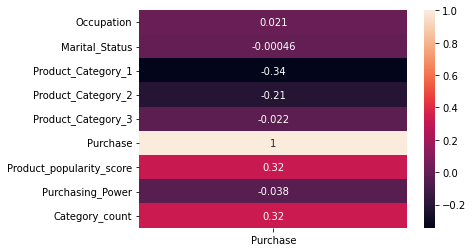

In [ ]:
sns.heatmap(df.corr()[['Purchase']],annot=True)

## Checking Null Values

In [ ]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
set                                0
Product_popularity_score           0
Purchasing_Power                   0
Category_count                     0
dtype: int64

## Checking value distribution of Product_Category_2 Column

In [ ]:
df['Product_Category_2'].value_counts().sort_index()

2.0     70498
3.0      4123
4.0     36705
5.0     37165
6.0     23575
7.0       854
8.0     91317
9.0      8177
10.0     4420
11.0    20230
12.0     7801
13.0    15054
14.0    78834
15.0    54114
16.0    61687
17.0    19104
18.0     4027
Name: Product_Category_2, dtype: int64

## Replacing null in Product_Category_2 with -ve value so the model understands these are null

In [ ]:
df['Product_Category_2']=df['Product_Category_2'].fillna(-1).astype(int)

## Replacing null in Product_Category_3 with -ve value

In [ ]:
cat_3_mode=df['Product_Category_3'].mode()[0]
df['Product_Category_3']=df['Product_Category_3'].fillna(-1).astype(int)


## Checking Null values again for confirmation

In [ ]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
set                                0
Product_popularity_score           0
Purchasing_Power                   0
Category_count                     0
dtype: int64

## Unique values distribution

In [ ]:
df.apply(lambda x:len(x.unique()))

Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18106
set                               2
Product_popularity_score        803
Purchasing_Power               5876
Category_count                    3
dtype: int64

## Checking for Categorical Variables 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  object 
 1   Age                         783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  object 
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  int64  
 8   Product_Category_3          783667 non-null  int64  
 9   Purchase                    550068 non-null  float64
 10  set                         783667 non-null  object 
 11  Product_popularity_score    783667 non-null  float64
 12  Purchasing_Power            783667 non-null  float64
 13  Category_count

In [ ]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,set,Product_popularity_score,Purchasing_Power,Category_count
0,F,0-17,10,A,2,0,3,-1,-1,8370.0,train,0.126662,0.027398,1
1,F,0-17,10,A,2,0,1,6,14,15200.0,train,0.311669,0.027398,3
2,F,0-17,10,A,2,0,12,-1,-1,1422.0,train,0.055022,0.027398,1
3,F,0-17,10,A,2,0,12,14,-1,1057.0,train,0.182792,0.027398,2
4,M,55+,16,C,4+,0,8,-1,-1,7969.0,train,0.104136,0.072810,1


In [ ]:
df["Age"].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

## Converting Age

In [ ]:
df['Age']=df["Age"].replace({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7}).astype(int)

In [ ]:
df['Age'].value_counts().sort_index()

1     21334
2    141953
3    313015
4    156724
5     65278
6     54784
7     30579
Name: Age, dtype: int64

## Converting City_Category into One hot encoding

In [ ]:
city_cat=pd.get_dummies(df['City_Category'],drop_first=True)

In [ ]:
city_cat

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [ ]:
df=pd.concat([df,city_cat],axis=1)

In [ ]:
df.drop('City_Category',axis=1,inplace=True)

In [ ]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,set,Product_popularity_score,Purchasing_Power,Category_count,B,C
0,F,1,10,2,0,3,-1,-1,8370.0,train,0.126662,0.027398,1,0,0
1,F,1,10,2,0,1,6,14,15200.0,train,0.311669,0.027398,3,0,0
2,F,1,10,2,0,12,-1,-1,1422.0,train,0.055022,0.027398,1,0,0
3,F,1,10,2,0,12,14,-1,1057.0,train,0.182792,0.027398,2,0,0
4,M,7,16,4+,0,8,-1,-1,7969.0,train,0.104136,0.072810,1,0,1


##Converting Gender

In [ ]:
df["Gender"]=df['Gender'].map({'M':0,'F':1})

In [ ]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,set,Product_popularity_score,Purchasing_Power,Category_count,B,C
0,1,1,10,2,0,3,-1,-1,8370.0,train,0.126662,0.027398,1,0,0
1,1,1,10,2,0,1,6,14,15200.0,train,0.311669,0.027398,3,0,0
2,1,1,10,2,0,12,-1,-1,1422.0,train,0.055022,0.027398,1,0,0
3,1,1,10,2,0,12,14,-1,1057.0,train,0.182792,0.027398,2,0,0
4,0,7,16,4+,0,8,-1,-1,7969.0,train,0.104136,0.072810,1,0,1


In [ ]:
df["Stay_In_Current_City_Years"].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

## Converting Stay_In_Current_City_Years

In [ ]:
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace('+','').astype(int)

<ipython-input-132-323548bbe965>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace('+','').astype(int)


In [ ]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'set', 'Product_popularity_score',
       'Purchasing_Power', 'Category_count', 'B', 'C'],
      dtype='object')

In [ ]:
df=df.loc[:,[ 'Gender', 'Age', 'Occupation','B', 'C',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
              'Product_Category_2', 'Product_Category_3','Category_count','Product_popularity_score','Purchasing_Power','Purchase','set']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   B                           783667 non-null  uint8  
 4   C                           783667 non-null  uint8  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  int64  
 9   Product_Category_3          783667 non-null  int64  
 10  Category_count              783667 non-null  int64  
 11  Product_popularity_score    783667 non-null  float64
 12  Purchasing_Power            783667 non-null  float64
 13  Purchase      

## Cleaned dataset

In [191]:
df.head()

,Gender,Age,Occupation,B,C,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_count,Product_popularity_score,Purchasing_Power,Purchase,set
0,1,1,10,0,0,2,0,3,-1,-1,1,0.126662,0.027398,0.348992,train
1,1,1,10,0,0,2,0,1,6,14,3,0.311669,0.027398,0.634181,train
2,1,1,10,0,0,2,0,12,-1,-1,1,0.055022,0.027398,0.058875,train
3,1,1,10,0,0,2,0,12,14,-1,2,0.182792,0.027398,0.043634,train
4,0,7,16,0,1,4,0,8,-1,-1,1,0.104136,0.072810,0.332248,train


## Final Correlation Matrix

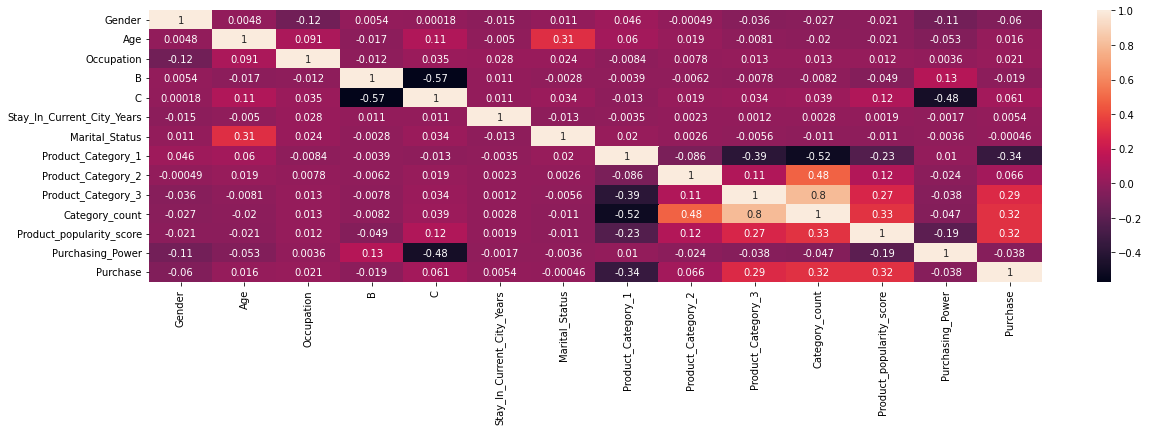

In [190]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True)

## Normalizing purchase feature for better modelling

In [ ]:
#normalizing purchase feature for better modelling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df['Purchase']=scaler.fit_transform(df[['Purchase']])


In [ ]:
df['Purchase'].sort_values(ascending=False)

370891    1.000000
93016     1.000000
87440     1.000000
503697    0.999958
321782    0.999958
            ...   
233594         NaN
233595         NaN
233596         NaN
233597         NaN
233598         NaN
Name: Purchase, Length: 783667, dtype: float64

In [ ]:
df_bak2=df

# Modelling

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

### Dividing data into train and test on the basis of the flag set

In [ ]:
#dividing data into train and test on the basis of the flag set
df_train=df[df['set']=='train']
df_test=df[df['set']=='test']


In [ ]:
df_train.drop('set',axis=1,inplace=True)
df_test.drop('set',axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
target=df_train['Purchase']

In [ ]:
df_train.drop('Purchase',axis=1,inplace=True)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df_train,target,test_size=0.2,random_state=42)

### Checking importance of features

In [ ]:
#checking importance of features
from sklearn.feature_selection import SelectKBest, mutual_info_regression

K_features = 'all'
ft_scorer = SelectKBest(score_func=mutual_info_regression, k=K_features)
print(X_train.shape)
print(y_train.shape)
X = ft_scorer.fit_transform(X_train, y_train)


(440054, 13)
(440054,)


In [ ]:
pd.Series(ft_scorer.scores_*1000, index=df_train.columns).sort_values(ascending=False)

Product_Category_1            1669.641452
Product_popularity_score      1070.421238
Product_Category_2             529.360141
Product_Category_3             234.620595
Category_count                 171.956953
Purchasing_Power                70.651576
Occupation                       9.624324
Gender                           6.898495
Age                              5.438610
C                                3.390445
B                                1.198837
Stay_In_Current_City_Years       0.750075
Marital_Status                   0.000000
dtype: float64

### Decision Tree Regressor

#### Applying GridSearchCV hyperparameter tuning on Decision Tree Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
params=[{'max_depth':range(1,10)}]
dt_grid = GridSearchCV(DecisionTreeRegressor(), params, refit = True)

In [ ]:
dt_grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': range(1, 10)}])

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print(np.sqrt(mean_squared_error(y_test,y_pred)))
r2_score(y_test,y_pred)

0.18733191911620875


0.1989274194272881

#### Best Parameters for Decision Tree Regressor

In [ ]:
print(dt_grid.best_params_)
print(dt_grid.best_estimator_)

{'max_depth': 9}
DecisionTreeRegressor(max_depth=9)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=9)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

0.11737424108918598
0.6855193729461644


### XGBRegressor

#### XGBRegressor hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
params=[{
        'eta':range(0,1),
        'max-depth':range(1,20),
         'tree_method':['auto', 'exact', 'approx', 'hist', 'gpu_hist'],
         'grow_policy':['depthwise', 'lossguide'],
         'max_leaves':range(1,10)}]

        
xgb_grid =GridSearchCV(xgb.XGBRegressor(), params, refit = True)

##### With 100,000 instances.

In [ ]:
xgb_grid.fit(X_train[:100000],y_train[:100000])
xgb_grid.best_params_

Streaming output truncated to the last 5000 lines.
[18:46:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:46:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:47:19] WARNING: /workspace/src/objective/regression_obj.

##### With 15,000 instances.

In [ ]:
xgb_grid.fit(X_train[:15000],y_train[:15000])
xgb_grid.best_params_

Streaming output truncated to the last 5000 lines.
[16:18:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:19:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:19:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:19:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:19:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:19:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:19:03] WARNING: /workspace/src/objective/regression_obj.

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1710 fits failed out of a total of 8550.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py", line 391, in fit
    self._Booster = train(params, trainDmatrix,
  File "/usr/local/lib/python3.8/dist-packages/xgboost/training.py", line 212, in train
    return _train_internal(params, dtrain,
  File "/usr/local/lib/python3.8/dist-packages/xgbo

{'eta': 0,
 'grow_policy': 'lossguide',
 'max-depth': 1,
 'max_leaves': 7,
 'tree_method': 'hist'}

#### XGBRegressor best params

In [ ]:
xgb_grid.best_params_

{'eta': 0,
 'grow_policy': 'lossguide',
 'max-depth': 1,
 'max_leaves': 7,
 'tree_method': 'hist'}

These calculated paramters are not giving best results since we used only of chunk of dataset to tune the hyperparamters due to lower computance

In [200]:
import xgboost as xgb
model=xgb.XGBRegressor(max_depth=13)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))


[03:04:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.1064946434014973
0.7411168230251325


### Random Forest Regressor

#### Hyperparameter tuning for Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
params = [{'max_depth': [10,20,30, 60, 80, 90, 100],
           'min_samples_leaf': [1, 3, 4, 5],
          'min_samples_split': [2, 8, 10, 12],
          'n_estimators': [100, 200,300]}]
                      
rf_grid = GridSearchCV(RandomForestRegressor(n_jobs=10), params, refit = True, verbose = 3)

#### Best Parameters for Random Forest Regressor

In [ ]:
rf_grid.fit(X_train[0:5000],y_train[0:5000])
rf_grid.best_params_

Fitting 5 folds for each of 336 candidates, totalling 1680 fits
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.682 total time=   5.7s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.651 total time=   0.7s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.667 total time=   0.7s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.674 total time=   0.7s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.674 total time=   0.7s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.684 total time=   1.4s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.648 total time=   1.4s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.669 total time=

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 200}

Parameters

{'max_depth': 10,

 'min_samples_leaf': 3,

 'min_samples_split': 10,

 'n_estimators': 200}

#### Due to low computation accessibility we were only able to perform hyperparamter tuning for a small chunk of the dataset .

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=200,n_jobs=4)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

0.11342680238837338
0.7063164099661337


We get best results for XGBoost Regressor, therefore, we will use it as our model.

# Results and Learning Curvs

In the above steps, we have performed EDA and pre-processed the data accordingly. Missing values are taken care of, and the texual data is also handled by performing one-hot encoding. 

Here, our target is to predict the <b>purchase amount</b> an individual is likely to make on the black friday sale using information such as their gender, age, occupation, marital status, purchasing power, etc.  

It is a supervised learning problem as we have purchase amount for the data instances. And specifically, it is a Regression problem since we are trying to predict a continuous value (purchasing amount).

We trained three different regression model and evaluate their performance by plotting their learning curves. R^2 value is used to analyze the performance of models. The following models were trained as seen in the above sections:

(1) Linear Regressor

(2) Random Forest Regressor (Bagging Technique)

(3) XGBoost (Boosting Technique) 

The dataset that we have used has over 3,00,000 instances. Plotting Training curves for models on the complete dataset is a time-comsuming task. And sometimes training fails at the very end of many hours of training. So, we have used a subset of 25,000 data instances for our training plots. More data can be used for training to get more accurate models.


Training :  Linear Regression
Linear Regression  is trained.
Time taken :  0.647869348526001

Training :  RandomForest
RandomForest  is trained.
Time taken :  106.59112644195557

Training :  XGBoost
XGBoost  is trained.
Time taken :  1220.5953707695007


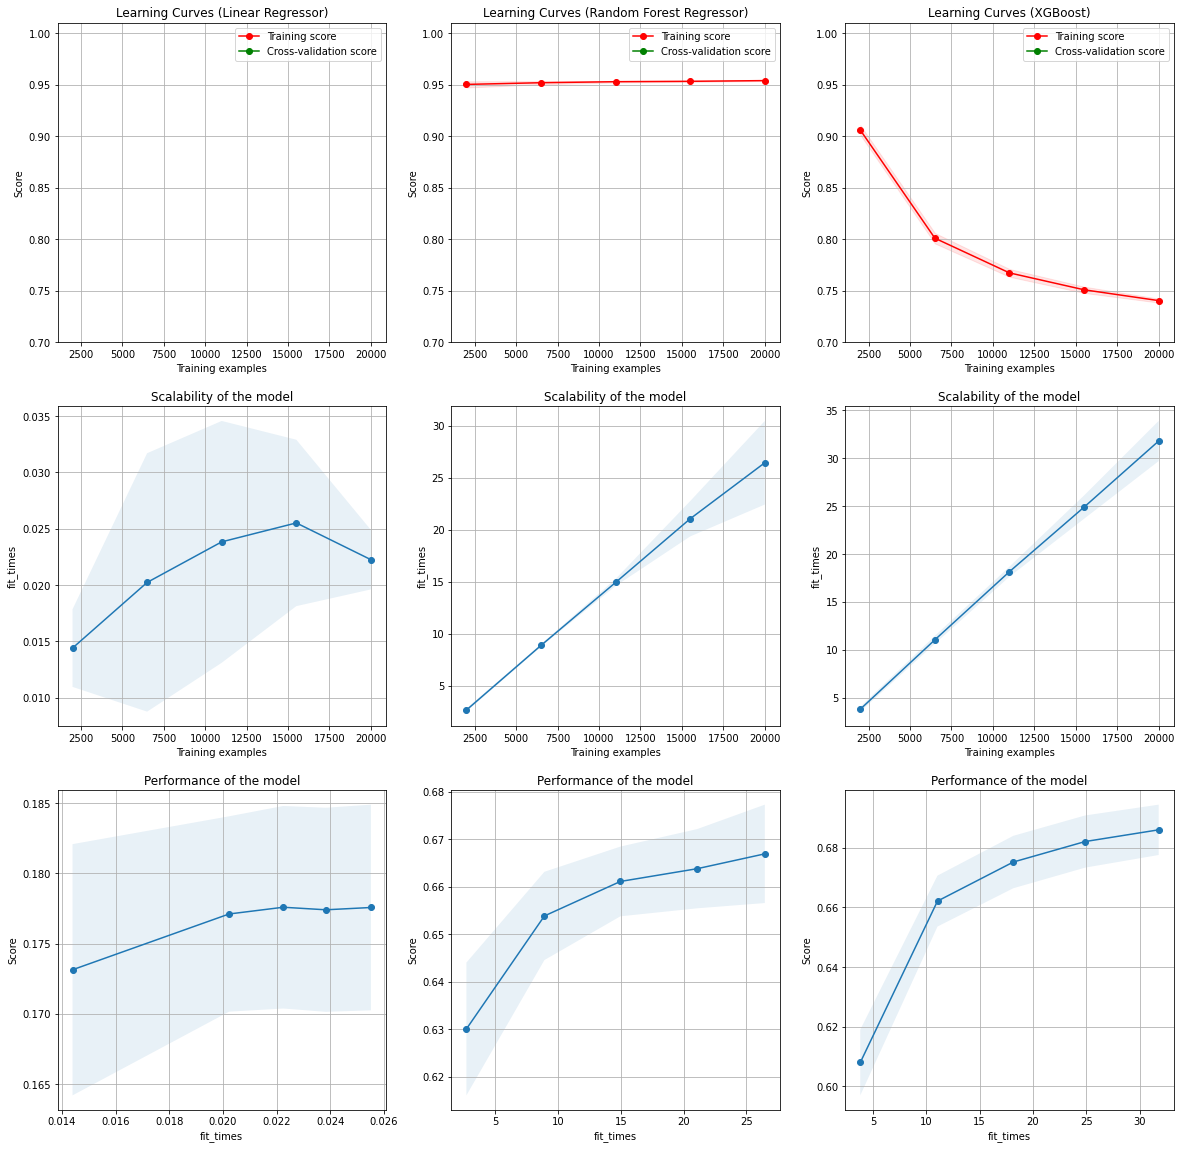

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from xgboost import XGBRegressor
import time

training_time = []


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
    model_name=None
):
    
    print("\nTraining : ", model_name)
    start_time = time.time()
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )

    training_time.append({"Model Name": model_name, "n_jobs": n_jobs, "Time": time.time() - start_time})

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    print(model_name, " is trained.")
    print("Time taken : ", time.time() - start_time)

    return plt


fig, axes = plt.subplots(3, 3, figsize=(20, 20))

# X, y = load_digits(return_X_y=True)

title = r"Learning Curves (Linear Regressor)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LinearRegression()
plot_learning_curve(
    estimator, 
    title, 
    X_train[:25000],
    y_train[:25000],
    axes=axes[:, 0], 
    ylim=(0.7, 1.01), 
    cv=cv, 
    n_jobs=4, 
    scoring="r2",
    model_name="Linear Regression"
)

title = r"Learning Curves (Random Forest Regressor)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = RandomForestRegressor(n_estimators=100)
plot_learning_curve(
    estimator, 
    title, 
    X_train[:25000],
    y_train[:25000],   
    axes=axes[:, 1], 
    ylim=(0.7, 1.01), 
    cv=cv, 
    n_jobs=4, 
    scoring="r2",
    model_name="RandomForest"
)

title = "Learning Curves (XGBoost)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = XGBRegressor(n_estimators=1000)
plot_learning_curve(
    estimator,
    title,
    X_train[:25000],
    y_train[:25000], 
    axes=axes[:, 2],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="r2",
    model_name="XGBoost"
)



plt.show()

In the above graphs, the learning curves, the scalability and the performance of the models are plotted.<br>
We use Linear Regression as our baseline model and compare other models with its curve.<br>
The Training learning curve for the XGBoost algorithm is going down as well as the Validation scores goes up shows us the model is getting better. **The XGBoost algorithm can score more in terms of predicting the purchase amount. Therefore, it turns out to be the best algorithm if we compare the learning curves.**<br>
The RandomForestRegressor , shows it may be able to learn with the increase of training data. Its training score does not change much. 


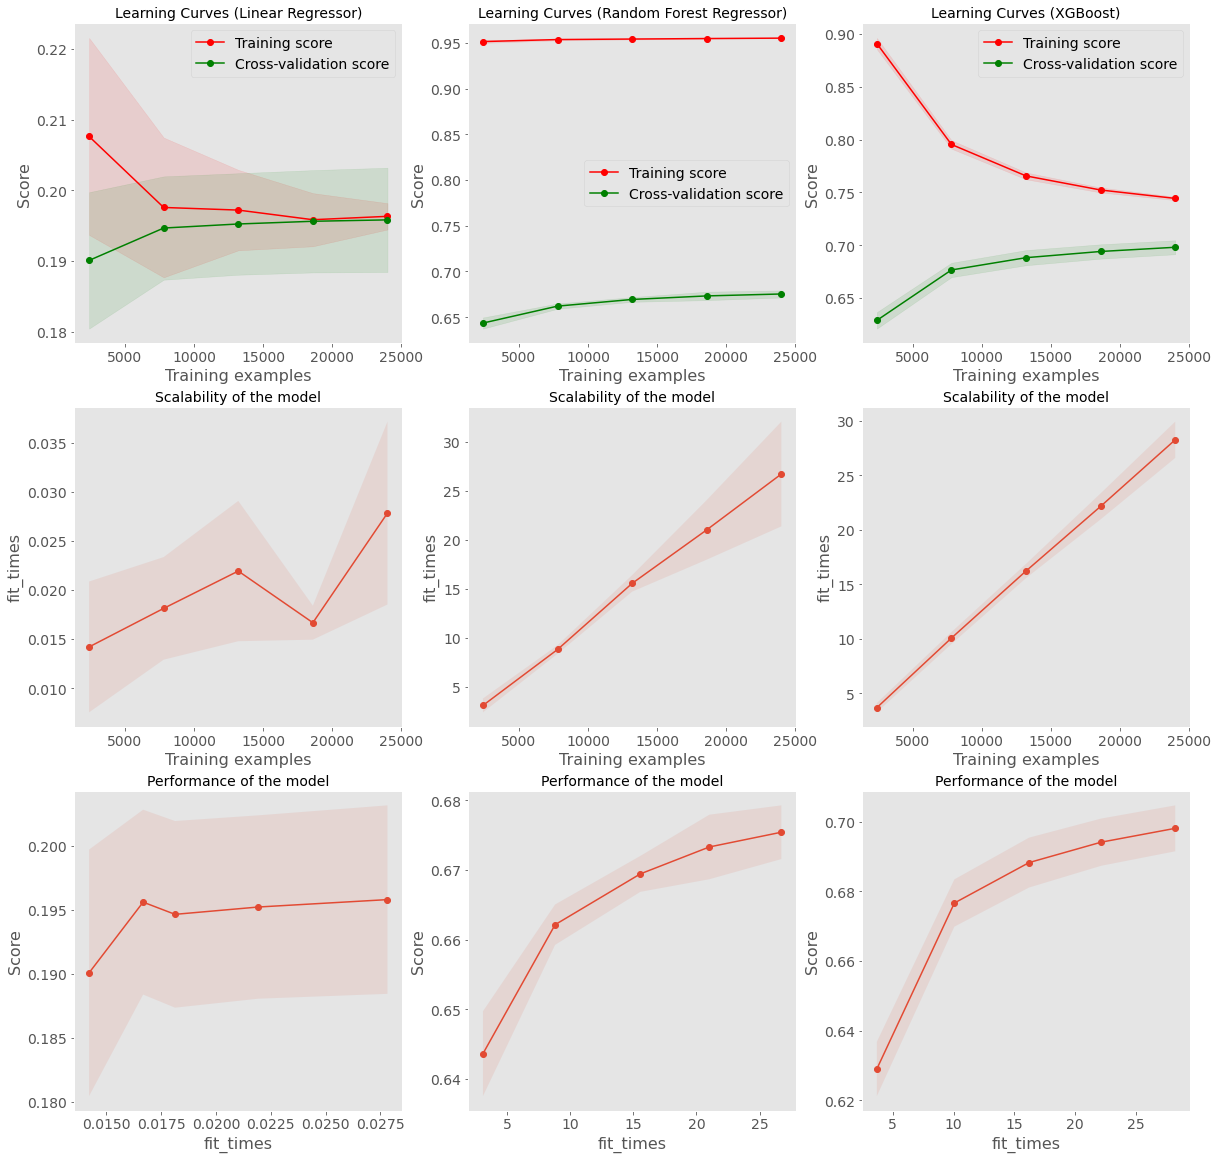

### Predicting values for test data provided by kaggle

In [195]:
df_test.drop(['Purchase'],axis=1,inplace=True)
df_test.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Gender,Age,Occupation,B,C,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Category_count,Product_popularity_score,Purchasing_Power
0,0,5,7,1,0,2,1,1,11,-1,2,0.491876,0.015232
1,0,3,17,0,1,0,0,3,5,-1,2,0.136632,0.052184
2,1,4,1,1,0,4,1,5,14,-1,2,0.079764,0.202363
3,1,4,1,1,0,4,1,4,9,-1,2,0.008124,0.202363
4,1,3,1,0,1,1,0,4,5,12,3,0.288035,0.048649


In [201]:
y_pred=model.predict(df_test)

In [202]:
df_pred=pd.DataFrame(y_pred,columns={'Predicted Purchase'})

In [203]:
df_pred['Purchase']=scaler.inverse_transform(df_pred[['Predicted Purchase']])

### Our Final Output. This model can be used by businesses to predict customer behaviour during Black Friday.

In [204]:
df_pred

,Predicted Purchase,Purchase
0,0.628084,15053.994141
1,0.432533,10370.739258
2,0.271535,6514.979980
3,0.118789,2856.878174
4,0.104091,2504.869385
...,...,...
233594,0.285133,6840.656250
233595,0.237353,5696.363281
233596,0.396020,9496.286133
233597,0.742370,17791.007812


# References

[1] https://www.kaggle.com/datasets/sdolezel/black-friday

[2] https://scikit-learn.org/stable/modules/learning_curve.html

[3] https://seaborn.pydata.org/generated/seaborn.heatmap.html

[4] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

[5] https://xgboost.readthedocs.io/en/stable/

[6] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

[7] https://www.investopedia.com/terms/r/r-squared.asp#:~:text=R%2Dsquared%20values%20range%20from,)%20you%20are%20interested%20in).

[8] https://medium.com/analytics-vidhya/sales-prediction-on-black-friday-using-ml-regression-technique-380af62c181e